In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
#download the weather images and put them in a directory
path = r'C:\Users\karim\Documents\machine learning\data\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [5]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 866 images belonging to 4 classes.
Found 215 images belonging to 4 classes.


In [7]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [9]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 6, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

C:\Users\karim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 30s 966ms/step - accuracy: 0.4904 - loss: 0.1496 - val_accuracy: 0.6771 - val_loss: 0.1128
Epoch 2/15
 1/27 ━━━━━━━━━━━━━━━━━━━━ 20s 799ms/step - accuracy: 0.6250 - loss: 0.1263

C:\Users\karim\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.6250 - loss: 0.1263 - val_accuracy: 0.6354 - val_loss: 0.1227
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 921ms/step - accuracy: 0.6751 - loss: 0.0987 - val_accuracy: 0.7396 - val_loss: 0.0897
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.6250 - loss: 0.1321 - val_accuracy: 0.7500 - val_loss: 0.0815
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 23s 834ms/step - accuracy: 0.7830 - loss: 0.0753 - val_accuracy: 0.8802 - val_loss: 0.0515
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.8438 - loss: 0.0677 - val_accuracy: 0.8177 - val_loss: 0.0766
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 24s 894ms/step - accuracy: 0.7062 - loss: 0.0952 - val_accuracy: 0.7604 - val_loss: 0.0824
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.7500 - loss: 0.0857 - val_accuracy: 0.7344 - val_loss: 0.0896
Epoch 9/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 26s 975ms/step - accuracy: 0.8010 - loss: 0.0722 - val_accuracy: 0.8594 - 

In [11]:
results = pd.DataFrame(model.history.history)

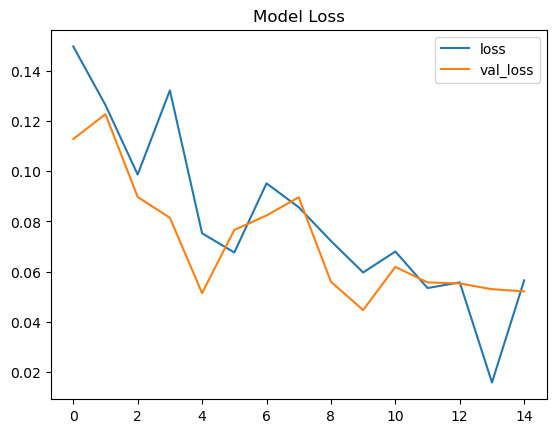

In [13]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

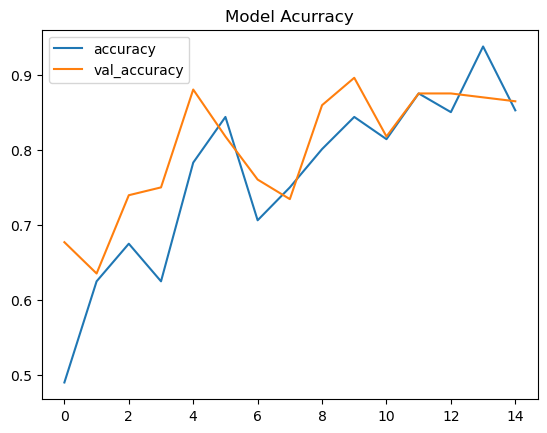

In [15]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [17]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.8525179624557495, Val_Accuracy: 0.8645833134651184
Loss: 0.05655429884791374, Val_Loss: 0.05219167098402977


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step


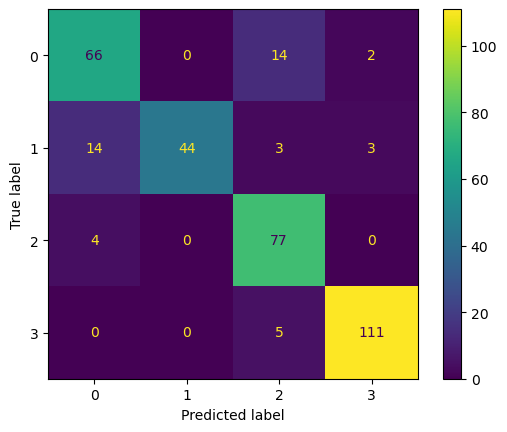

In [19]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10  #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [21]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


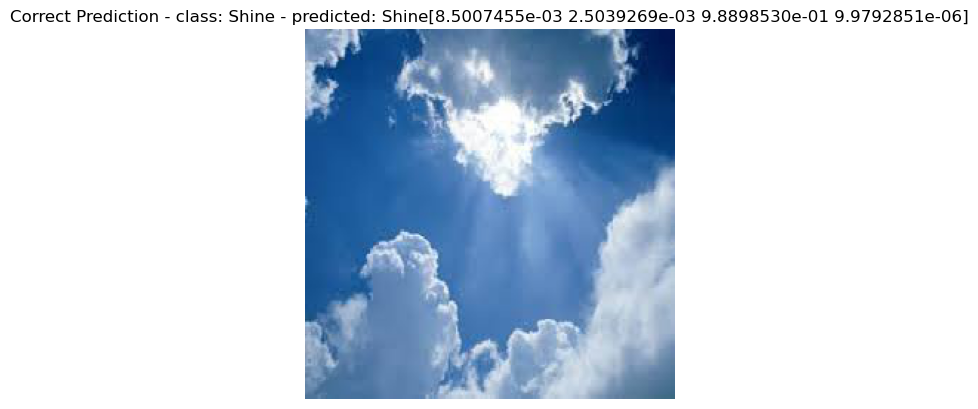

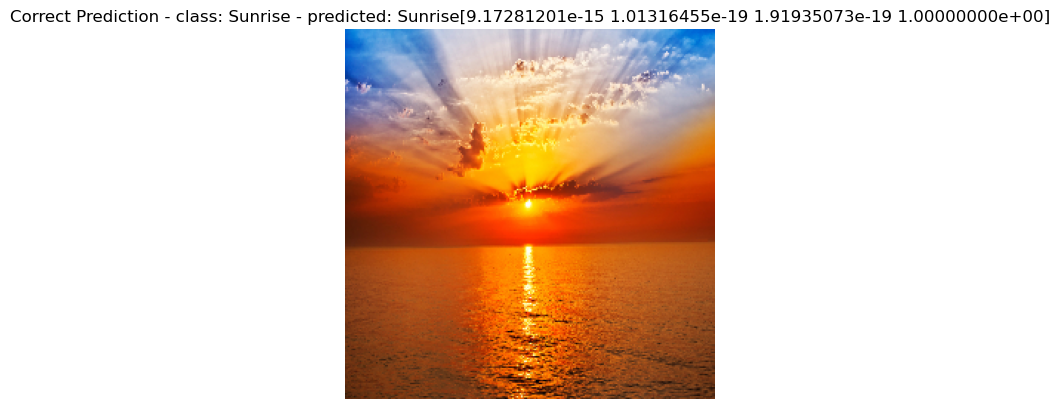

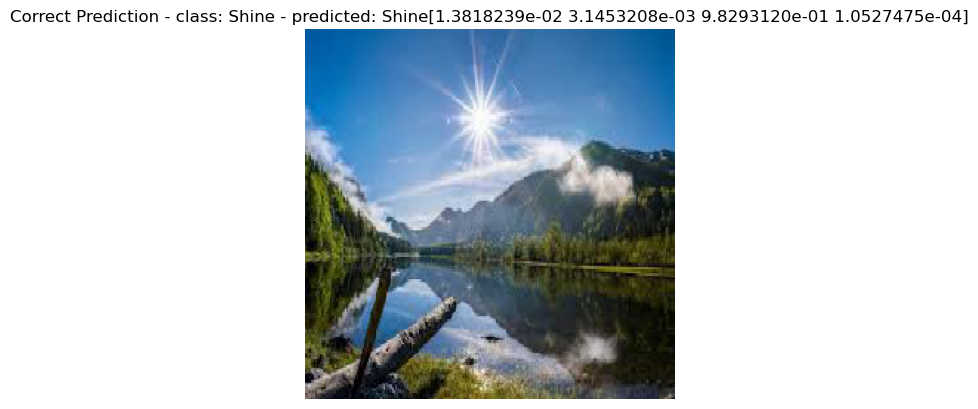

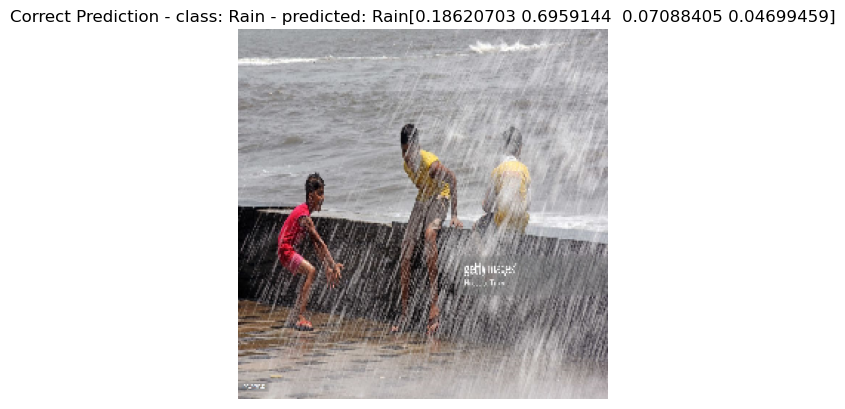

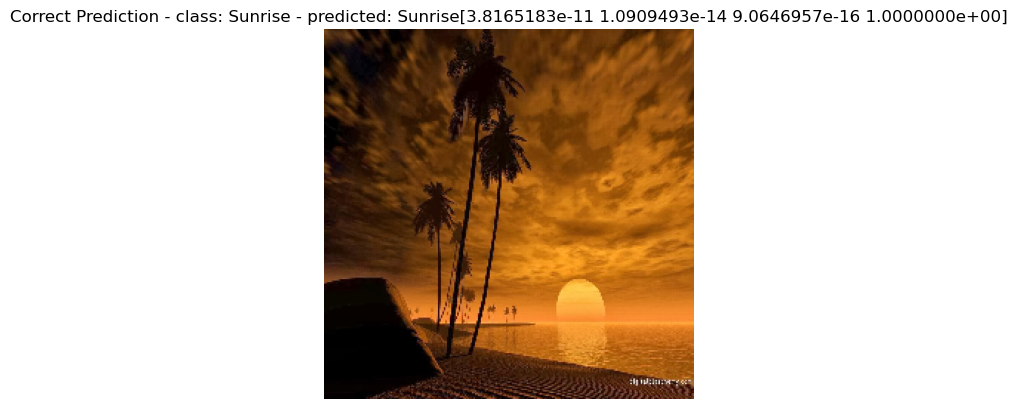

In [23]:
predict_one(model, 5) #<--you can show multiple pictures with this command. Just fill in the number you want to see.